In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !unzip "/content/drive/MyDrive/archive (16).zip" -d "/content/drive/MyDrive"

In [ ]:
# Version v04-08
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation
import sys
# !{sys.executable} -m pip install scipy
from scipy import stats
from scipy.stats import zscore
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.metrics import r2_score
from datetime import datetime
import time
import dateutil

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
#Data load 
a=["date","Appliances","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","RH_out","Windspeed","Visibility",'Press_mm_hg', 'Tdewpoint', 'lights']
#load the datasets
df = pd.read_csv(r"/content/drive/MyDrive/KAG_energydata_complete.csv",usecols=a)

In [ ]:
# Visualize data info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

(19735, 27)

In [ ]:
df.head(10)

date  Appliances  lights         T1       RH_1     T2  \
0  2016-01-11 17:00:00          60      30  19.890000  47.596667  19.20   
1  2016-01-11 17:10:00          60      30  19.890000  46.693333  19.20   
2  2016-01-11 17:20:00          50      30  19.890000  46.300000  19.20   
3  2016-01-11 17:30:00          50      40  19.890000  46.066667  19.20   
4  2016-01-11 17:40:00          60      40  19.890000  46.333333  19.20   
5  2016-01-11 17:50:00          50      40  19.890000  46.026667  19.20   
6  2016-01-11 18:00:00          60      50  19.890000  45.766667  19.20   
7  2016-01-11 18:10:00          60      50  19.856667  45.560000  19.20   
8  2016-01-11 18:20:00          60      40  19.790000  45.597500  19.20   
9  2016-01-11 18:30:00          70      40  19.856667  46.090000  19.23   

        RH_2     T3       RH_3         T4  ...    T8       RH_8         T9  \
0  44.790000  19.79  44.730000  19.000000  ...  18.2  48.900000  17.033333   
1  44.722500  19.79  44.790000  19.000000  ...  18.2  48.863333  17.066667   
2  44.626667  19.79  44.933333  18.926667  ...  18.2  48.730000  17.000000   
3  44.590000  19.79  45.000000  18.890000  ...  18.1  48.590000  17.000000   
4  44.530000  19.79  45.000000  18.890000  ...  18.1  48.590000  17.000000   
5  44.500000  19.79  44.933333  18.890000  ...  18.1  48.590000  17.000000   
6  44.500000  19.79  44.900000  18.890000  ...  18.1  48.590000  17.000000   
7  44.500000  19.73  44.900000  18.890000  ...  18.1  48.590000  17.000000   
8  44.433333  19.73  44.790000  18.890000  ...  18.1  48.590000  17.000000   
9  44.400000  19.79  44.863333  18.890000  ...  18.1  48.590000  17.000000   

    RH_9     T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  
0  45.53  6.600000   733.500000  92.000000   7.000000   63.000000   5.300000  
1  45.56  6.483333   733.600000  92.000000   6.666667   59.166667   5.200000  
2  45.50  6.366667   733.700000  92.000000   6.333333   55.333333   5.100000  
3  45.40  6.250000   733.800000  92.000000   6.000000   51.500000   5.000000  
4  45.40  6.133333   733.900000  92.000000   5.666667   47.666667   4.900000  
5  45.29  6.016667   734.000000  92.000000   5.333333   43.833333   4.800000  
6  45.29  5.900000   734.100000  92.000000   5.000000   40.000000   4.700000  
7  45.29  5.916667   734.166667  91.833333   5.166667   40.000000   4.683333  
8  45.29  5.933333   734.233333  91.666667   5.333333   40.000000   4.666667  
9  45.29  5.950000   734.300000  91.500000   5.500000   40.000000   4.650000  

[10 rows x 27 columns]

2. Data Preprosessing
After loading both data set I checked the info of both data set Checked and sum the null values Cheeked the unique values of different attributes Dropped the irrelevant attributes according to evaluation data set Recalculated the null values and then fill the null values Checked the description of data sets and checked the relevant attributes (mean, minimum, maximum, and std ) for regression make a new development data set according to the price is greater than 0 I applied all the unmentioned steps on the both data sets. I checked the correlation on development data set Rationalize the related attributes values for regression analysis For visualization I plotted the different graphs as well

# 2.1 Extracting components from date object

In [ ]:
#This line creates a new column in the DataFrame called "exact_date". It uses the "str.split()" method to split the values in the "date" column by spaces, and then selects the first element of the resulting list (which should be the date).
df["exact_date"]=df['date'].str.split(' ').str[0]
#This line creates a new column in the DataFrame called "hours". It uses a combination of "str.split()" and indexing to extract the hour value from the "date" column. It then uses the "astype()" method to convert the resulting string to an integer.
df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
#This line creates a new column in the DataFrame called "seconds". It uses "str.split()" and indexing to extract the minute value from the "date" column. It then uses "astype()" to convert the resulting string to an integer, and multiplies it by 60 to convert it to seconds.
df["seconds"]=((df['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)
#These lines create two new columns in the DataFrame called "days" and "days_num". They first use "str.split()" to extract the date from the "date" column, and then use the "apply()" method to parse the date using the "dateutil.parser.parse()" function. This function is used to convert the date string into a datetime object, which allows us to extract the day of the week using the "dt.dayofweek" attribute. Finally, the "dt.day_name()" attribute is used to convert the day of the week to a string (e.g., "Monday", "Tuesday", etc.).
df["days"]=(df['date'].str.split(' ').str[0])
df["days"]=(df['days'].apply(dateutil.parser.parse, dayfirst=True))
df["days_num"]=(df['days'].dt.dayofweek).astype(str).astype(int)
df["days"]=(df['days'].dt.day_name())

In [ ]:
df['date']

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object

In [ ]:
# df.info()

In [ ]:
#The df.describe() method in pandas provides summary statistics of a DataFrame, such as the count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value for each column in the DataFrame. The output of df.describe() can provide useful information about the distribution of data in each column.
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...          RH_9         T_out   Press_mm_hg        RH_out  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     41.552401      7.411665    755.522602     79.750418   
std    ...      4.151497      5.317409      7.399441     14.901088   
min    ...     29.166667     -5.000000    729.300000     24.000000   
25%    ...     38.500000      3.666667    750.933333     70.333333   
50%    ...     40.900000      6.916667    756.100000     83.666667   
75%    ...     44.338095     10.408333    760.933333     91.666667   
max    ...     53.326667     26.100000    772.300000    100.000000   

          Windspeed    Visibility     Tdewpoint         hours       seconds  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       4.039752     38.330834      3.760707     11.502002   1499.923993   
std        2.451221     11.794719      4.194648      6.921953   1024.750707   
min        0.000000      1.000000     -6.600000      0.000000      0.000000   
25%        2.000000     29.000000      0.900000      6.000000    600.000000   
50%        3.666667     40.000000      3.433333     12.000000   1200.000000   
75%        5.500000     40.000000      6.566667     17.000000   2400.000000   
max       14.000000     66.000000     15.500000     23.000000   3000.000000   

           days_num  
count  19735.000000  
mean       3.066937  
std        1.996609  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  

[8 rows x 29 columns]

# 2.2 Visualizing Per day consumption
Seasonality
this is used to track seasonality. but we have only 4.25 months data so there were no traces of seasonality

The traces shows that there is varaiation of electric usage on granular terms (like days)

 The overall description of this code is that it creates a bar chart to visualize the total energy consumption of a set of appliances for each unique date in a DataFrame. The DataFrame likely contains data on energy usage from a set of appliances (e.g. a home or building) over a period of time.
 The code first creates a numpy array of unique dates from a "date" column in the DataFrame. It then creates a categorical variable based on the "date" column, with the categories ordered based on the unique dates in the numpy array.

Next, the code creates a pivot table from the DataFrame using the "pd.pivot_table()" function. The pivot table groups the data by the unique dates in the categorical variable, and calculates the sum of the "Appliances" column for each date.

Finally, the code creates a bar chart using the "plot()" method of the pivot table. The resulting chart displays the total energy consumption of the appliances for each unique date in the DataFrame. This visualization can be useful for identifying patterns or trends in energy usage over time.







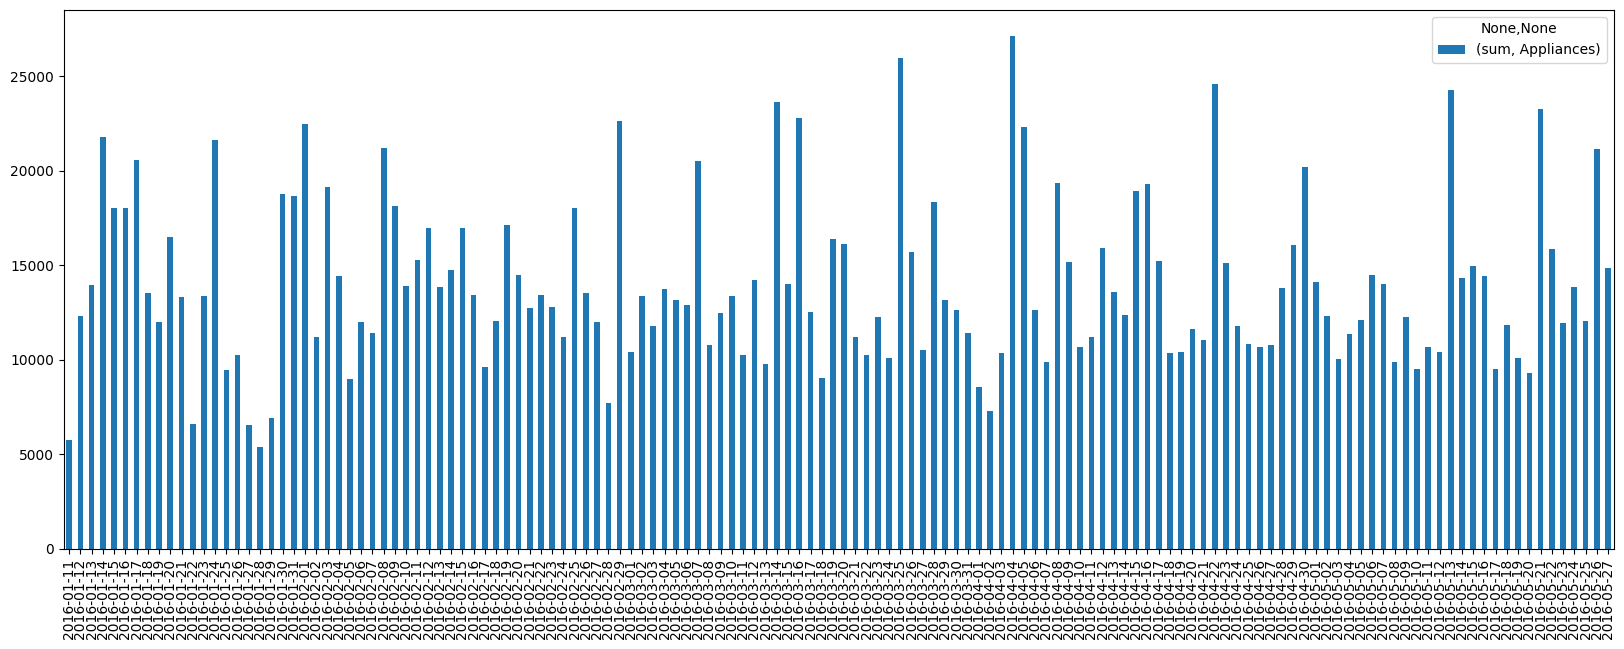

In [ ]:
dates=df["exact_date"].unique()
arranged_day = pd.Categorical(df["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(df,
               values="Appliances",index=date_series,
               aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

# 2.3 Visualizing data 
by Hour Wise Daily Consumption
we also saw a trend in hourly consumption

First, this code imports necessary libraries such as pandas, numpy, and matplotlib. Then it defines a list of weekdays and creates a categorical variable of days from the dataframe df using the pd.Categorical function. This ensures that the days are ordered correctly.

Next, it creates a series from the categorical variable and defines a pivot table using pd.pivot_table. The pivot table groups the data by hours and weekdays and calculates the sum of Appliances for each group. The resulting table will have the hours on the y-axis and the weekdays on the x-axis, with the values in the cells indicating the sum of Appliances for each hour and weekday combination.

After creating the pivot table, the code creates a heatmap using plt.pcolor. The heatmap is based on the pivot table, with the colors representing the values in each cell. The color scale is determined by the plt.colorbar function.

Finally, the code sets labels and ticks for the x-axis and y-axis, and displays the plot using plt.show().

Overall, this code generates a heatmap of the sum of Appliances for each hour and weekday combination. The resulting plot can help identify patterns in energy usage and inform decisions about energy conservation or management.

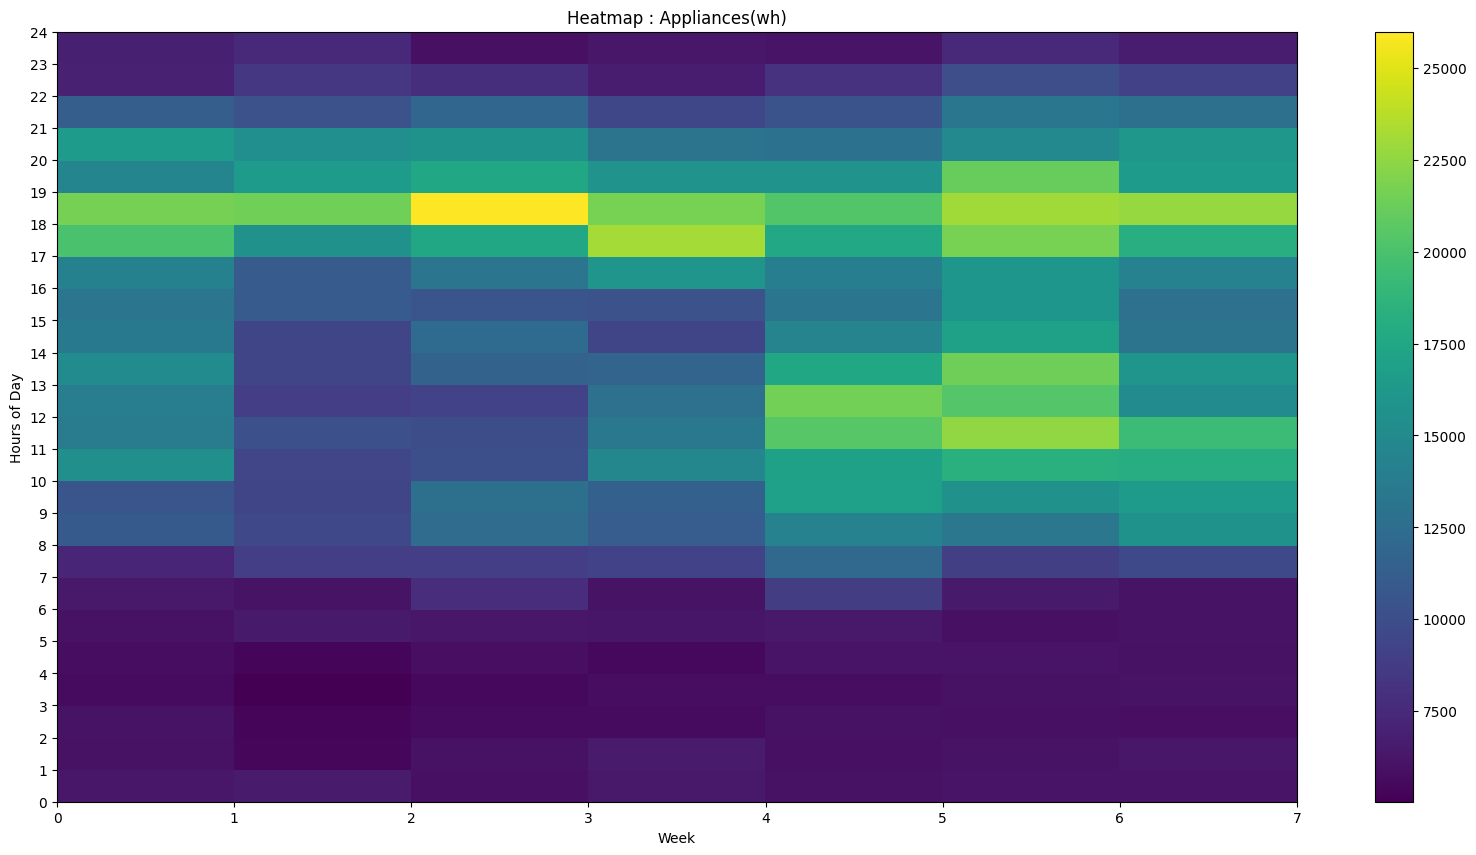

In [ ]:



days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday","Sunday"]
arranged_day = pd.Categorical(df["days"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df,index=["hours"],
               values="Appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()



# 2.4 Ploting
This plot shows that there is no such coorelation between energy conuption on weekdays vs off days

<Axes: >

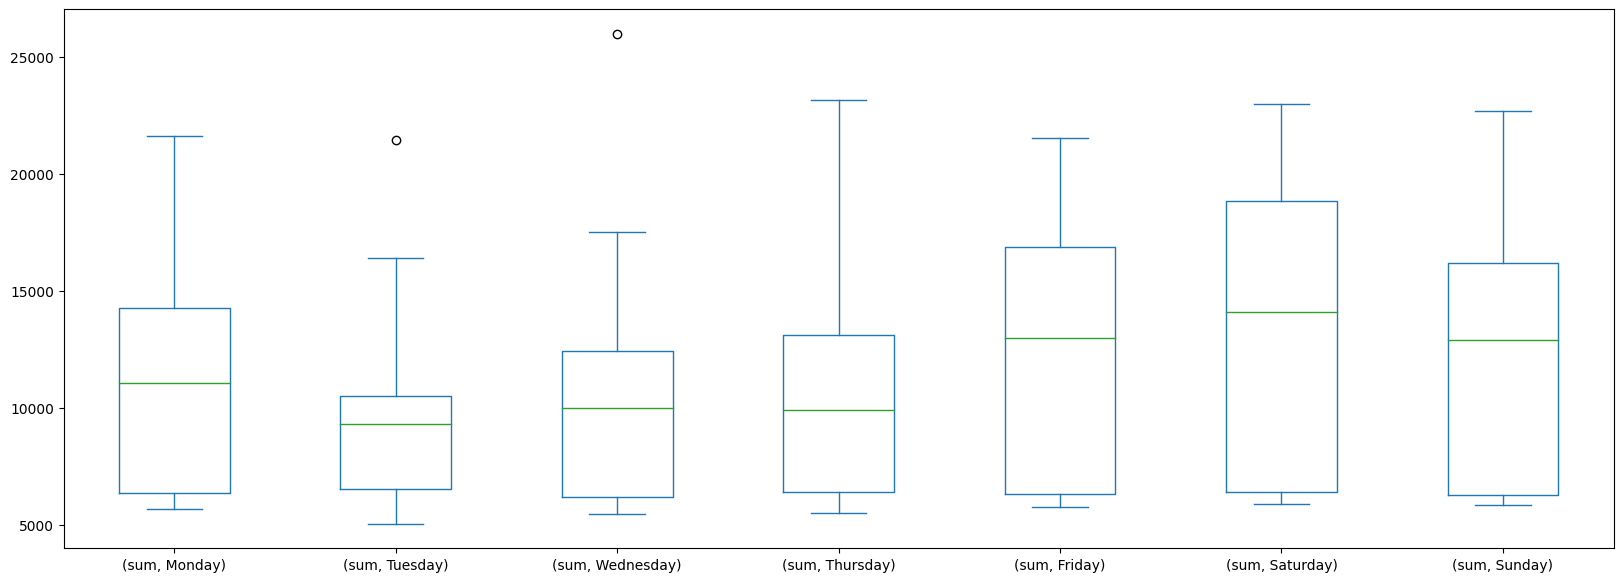

In [ ]:
table.plot.box(figsize=(20, 7))

In [ ]:
# df.head()

First, it creates a new DataFrame called table by selecting specific columns from the original df DataFrame. The columns selected are: "Appliances", "lights", "T1", "RH_1", "Press_mm_hg", "RH_out", "Windspeed", "Visibility", "Tdewpoint", "hours", and "days_num".

Next, the sns.pairplot function is used to create a pair plot based on the table DataFrame. A pair plot is a type of plot that allows you to visualize pairwise relationships between variables in a dataset. In this case, the plot will show scatter plots for each pair of variables, as well as histograms for each individual variable along the diagonal.

The resulting plot will have a grid of scatter plots and histograms, where each scatter plot shows the relationship between two variables and each histogram shows the distribution of a single variable. By visualizing these pairwise relationships, we can identify patterns and correlations between the variables and gain insights into how they relate to each other.

Overall, this code creates a pair plot to help visualize the relationships between selected variables in the df DataFrame.

In [ ]:

table=df[["Appliances",'lights', 'T1', 'RH_1',"Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint",'hours','days_num']]

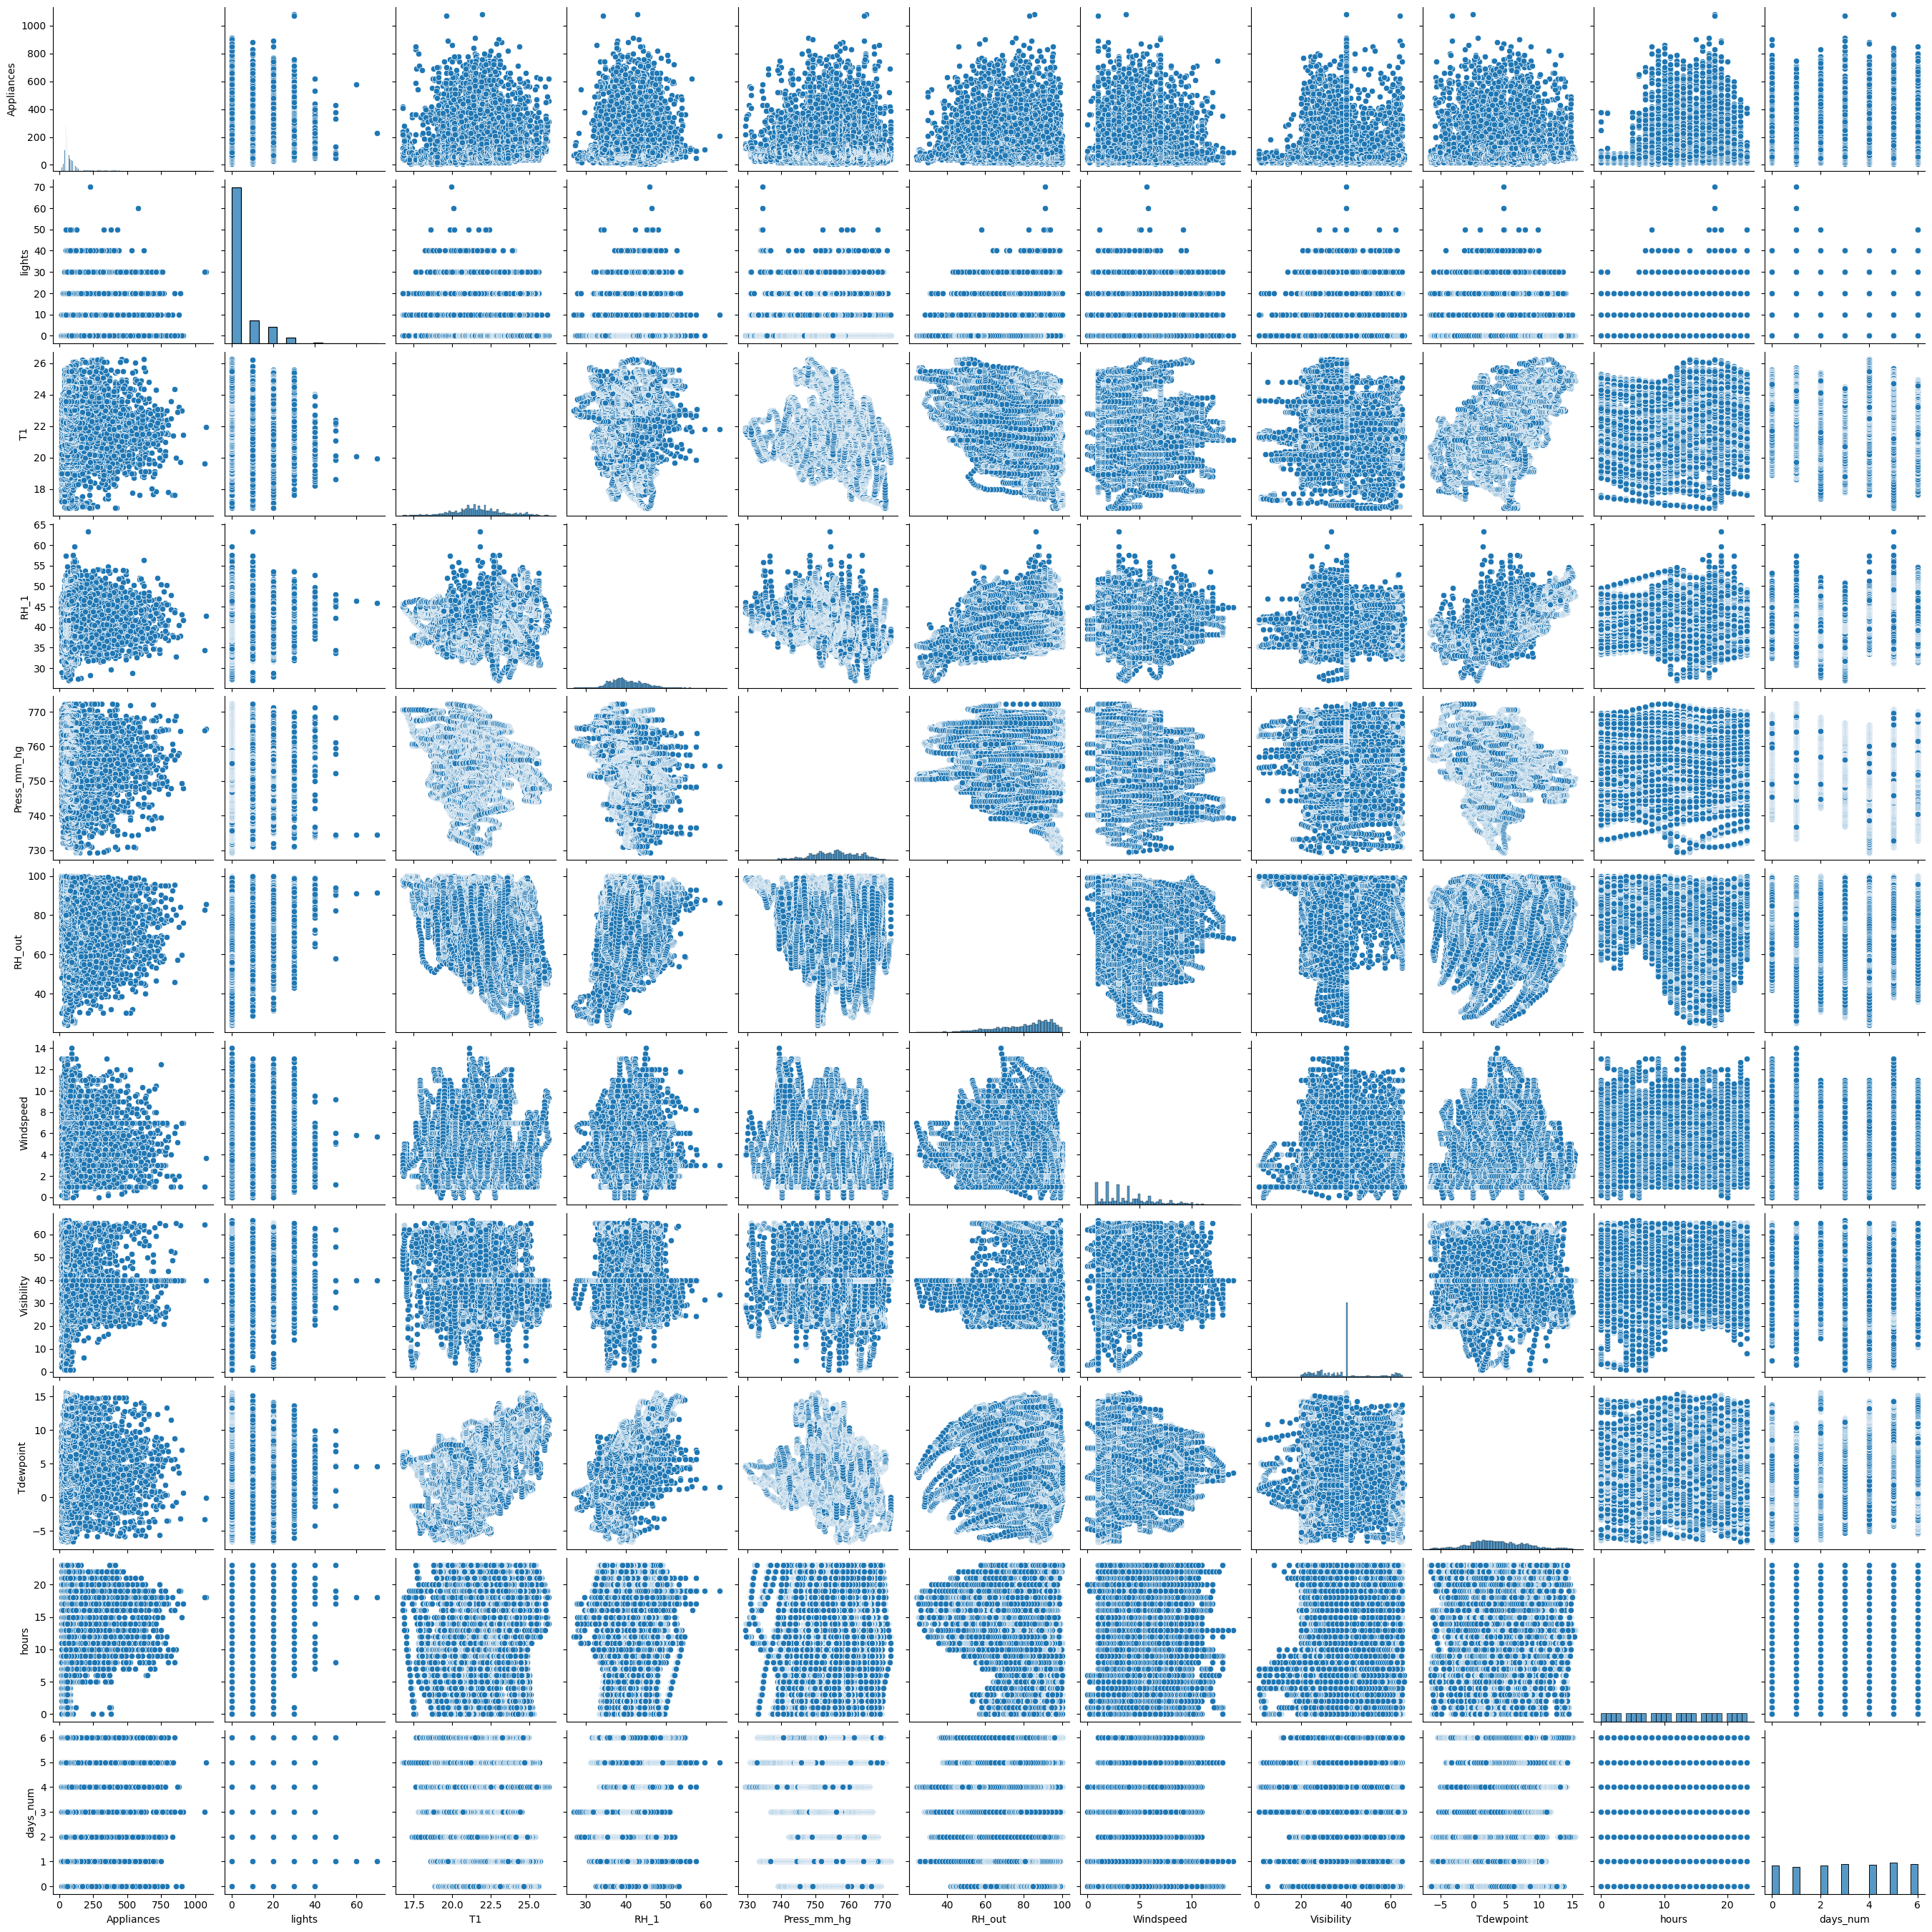

In [ ]:
sns.pairplot(table)

## 2.5 Null Values Check and remove 


In [ ]:
df_d=df
df_d.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
exact_date     0
hours          0
seconds        0
days           0
days_num       0
dtype: int64

## 2.6 Outlier Removal

In [ ]:
df_d.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...          RH_9         T_out   Press_mm_hg        RH_out  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     41.552401      7.411665    755.522602     79.750418   
std    ...      4.151497      5.317409      7.399441     14.901088   
min    ...     29.166667     -5.000000    729.300000     24.000000   
25%    ...     38.500000      3.666667    750.933333     70.333333   
50%    ...     40.900000      6.916667    756.100000     83.666667   
75%    ...     44.338095     10.408333    760.933333     91.666667   
max    ...     53.326667     26.100000    772.300000    100.000000   

          Windspeed    Visibility     Tdewpoint         hours       seconds  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       4.039752     38.330834      3.760707     11.502002   1499.923993   
std        2.451221     11.794719      4.194648      6.921953   1024.750707   
min        0.000000      1.000000     -6.600000      0.000000      0.000000   
25%        2.000000     29.000000      0.900000      6.000000    600.000000   
50%        3.666667     40.000000      3.433333     12.000000   1200.000000   
75%        5.500000     40.000000      6.566667     17.000000   2400.000000   
max       14.000000     66.000000     15.500000     23.000000   3000.000000   

           days_num  
count  19735.000000  
mean       3.066937  
std        1.996609  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  

[8 rows x 29 columns]

This code plots a histogram of the "Appliances" column in the df_d DataFrame using the plot function from Pandas and the show function from Matplotlib.

The kind parameter is set to "hist", which specifies that the plot should be a histogram. The figsize parameter sets the size of the plot.

The resulting plot will have the "Appliances" values on the x-axis and the frequency of each value on the y-axis. The histogram allows us to visualize the distribution of the "Appliances" values, including the range of values, the frequency of each value, and any outliers or skewness in the data.

Overall, this code provides a quick and easy way to visualize the distribution of the "Appliances" column in the df_d DataFrame using a histogram.

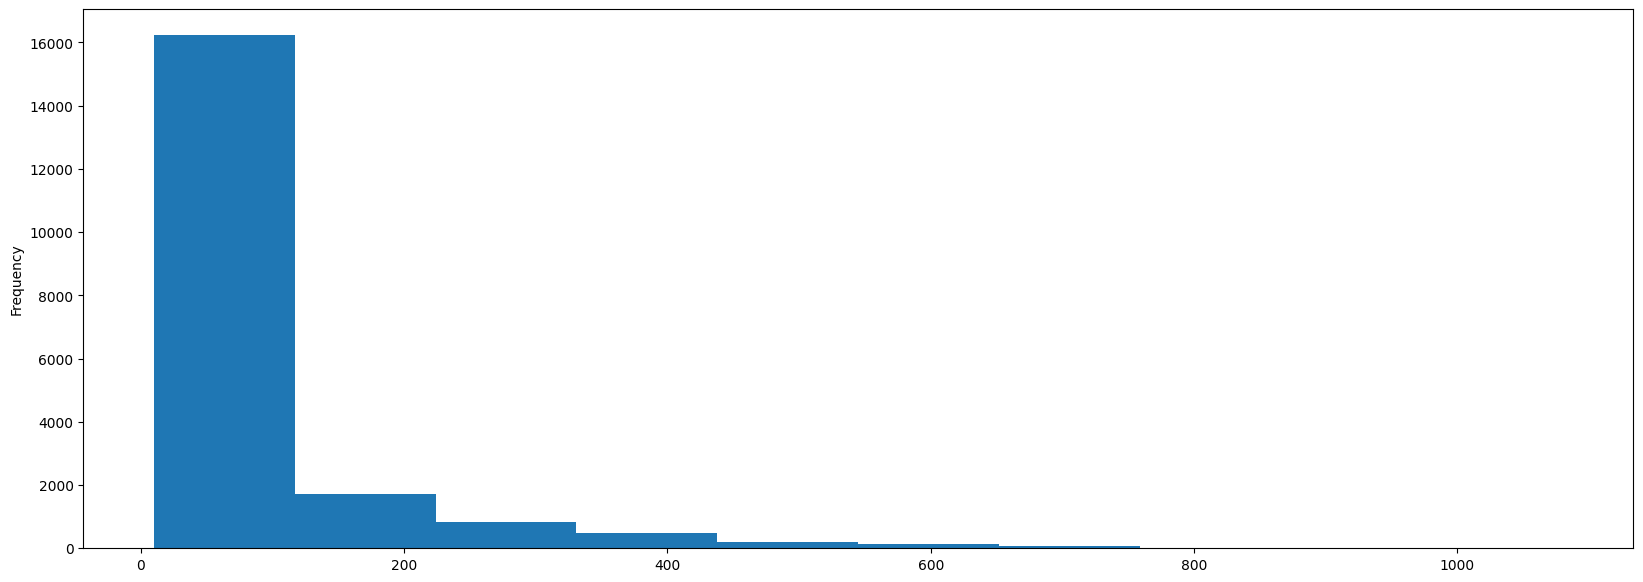

In [ ]:
df_d['Appliances'].plot(kind="hist",figsize=(20, 7))
plt.show()

This code performs outlier detection and removal for the "Appliances" column in the df_d DataFrame.

First, it selects the "Appliances" column and calculates the interquartile range (IQR) using the quantile function from Pandas. The IQR is calculated as the difference between the 75th and 25th percentiles (Q3 and Q1, respectively).

Next, the code defines an empty set called outlierSet to store the indices of any outliers that are detected. It then iterates over the columns of a DataFrame called dfOutlier, which contains descriptive statistics for the "Appliances" column. For each column, it calculates the Q1, Q3, and IQR values using the describe function from Pandas.

Then, it creates a new DataFrame called outlierDf that contains boolean values indicating whether each value in the "Appliances" column is an outlier. This is determined by checking if each value falls below Q1 - 1.5IQR or above Q3 + 1.5IQR.

Finally, the code updates the outlierSet with the indices of any values that are identified as outliers, and drops these indices from the df_d DataFrame using the drop function from Pandas.

Overall, this code performs outlier detection and removal for the "Appliances" column in the df_d DataFrame, based on the interquartile range method with a threshold of 1.5*IQR.

In [ ]:
X=df_d[['Appliances']]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

dfOutlier=X.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((X[column] < (Q1 - 1.5 * IQR)) |(X[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        

df_d.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


In [ ]:
#examine the dataset
df_d.describe()

Appliances        lights            T1          RH_1            T2  \
count  17597.000000  17597.000000  17597.000000  17597.000000  17597.000000   
mean      67.209752      3.426152     21.687492     40.141387     20.289424   
std       28.480499      7.528597      1.603825      3.927986      2.168958   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.233333     18.790000   
50%       60.000000      0.000000     21.600000     39.530000     19.926667   
75%       80.000000      0.000000     22.600000     42.860000     21.463333   
max      170.000000     50.000000     26.200000     59.633333     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  17597.000000  17597.000000  17597.000000  17597.000000  17597.000000   
mean      40.472614     22.226352     39.160196     20.858703     38.983779   
std        4.061565      1.966206      3.221064      2.047649      4.322328   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.933333     20.790000     36.826667     19.566667     35.500000   
50%       40.560000     22.100000     38.466667     20.666667     38.363333   
75%       43.326667     23.290000     41.560000     22.100000     42.090000   
max       56.026667     29.100000     49.656667     26.200000     51.000000   

       ...          RH_9         T_out   Press_mm_hg        RH_out  \
count  ...  17597.000000  17597.000000  17597.000000  17597.000000   
mean   ...     41.554052      7.302405    755.571123     80.293038   
std    ...      4.164228      5.289522      7.339931     14.758579   
min    ...     29.166667     -5.000000    729.366667     24.000000   
25%    ...     38.530000      3.500000    751.000000     71.333333   
50%    ...     40.863333      6.850000    756.100000     84.500000   
75%    ...     44.290000     10.333333    760.950000     92.000000   
max    ...     53.326667     26.100000    772.266667    100.000000   

          Windspeed    Visibility     Tdewpoint         hours       seconds  \
count  17597.000000  17597.000000  17597.000000  17597.000000  17597.000000   
mean       3.969010     38.310560      3.759867     11.200659   1495.652668   
std        2.447740     11.963034      4.187652      7.132902   1025.080945   
min        0.000000      1.000000     -6.600000      0.000000      0.000000   
25%        2.000000     29.000000      0.933333      5.000000    600.000000   
50%        3.500000     40.000000      3.433333     11.000000   1200.000000   
75%        5.333333     40.000000      6.550000     17.000000   2400.000000   
max       14.000000     66.000000     15.500000     23.000000   3000.000000   

           days_num  
count  17597.000000  
mean       3.045008  
std        1.995824  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  

[8 rows x 29 columns]

In [ ]:
df_d.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'exact_date', 'hours', 'seconds', 'days',
       'days_num'],
      dtype='object')

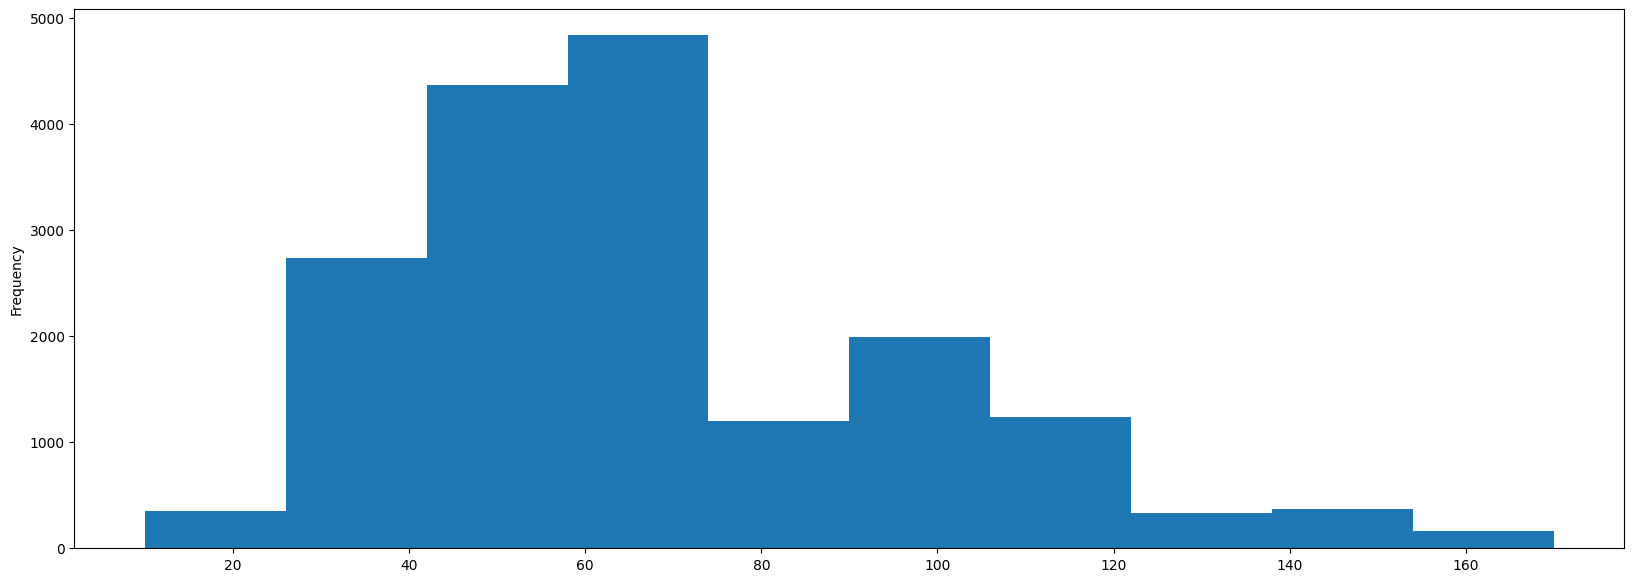

In [ ]:
df_d['Appliances'].plot(kind="hist",figsize=(20, 7))
plt.show()

# 2.8 Correlation

In [ ]:
corr_matrix = df_d.corr(method='pearson')
matrix=corr_matrix["Appliances"].sort_values(ascending=False)
print((matrix))

Appliances     1.000000
hours          0.416503
lights         0.291109
T8             0.268293
T2             0.264739
T1             0.248221
T6             0.223875
T_out          0.213651
T4             0.195689
T5             0.191782
T3             0.180061
T7             0.175519
T9             0.154471
Tdewpoint      0.081550
days_num       0.076565
RH_5           0.072040
Windspeed      0.055363
RH_1           0.045596
seconds       -0.008731
Visibility    -0.024974
RH_4          -0.036932
RH_3          -0.088410
Press_mm_hg   -0.089829
RH_2          -0.109746
RH_7          -0.128740
RH_9          -0.201968
RH_8          -0.218639
RH_6          -0.240142
RH_out        -0.252696
Name: Appliances, dtype: float64


<ipython-input-25-06d59fbc31c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_d.corr(method='pearson')


In [ ]:
df_d.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.730000  19.000000  ...        733.5    92.0   7.000000   
1  19.79  44.790000  19.000000  ...        733.6    92.0   6.666667   
2  19.79  44.933333  18.926667  ...        733.7    92.0   6.333333   
3  19.79  45.000000  18.890000  ...        733.8    92.0   6.000000   
4  19.79  45.000000  18.890000  ...        733.9    92.0   5.666667   

   Visibility  Tdewpoint  exact_date  hours  seconds     days  days_num  
0   63.000000        5.3  2016-01-11     17        0  Tuesday         1  
1   59.166667        5.2  2016-01-11     17      600  Tuesday         1  
2   55.333333        5.1  2016-01-11     17     1200  Tuesday         1  
3   51.500000        5.0  2016-01-11     17     1800  Tuesday         1  
4   47.666667        4.9  2016-01-11     17     2400  Tuesday         1  

[5 rows x 32 columns]

<ipython-input-27-a8adedf93834>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


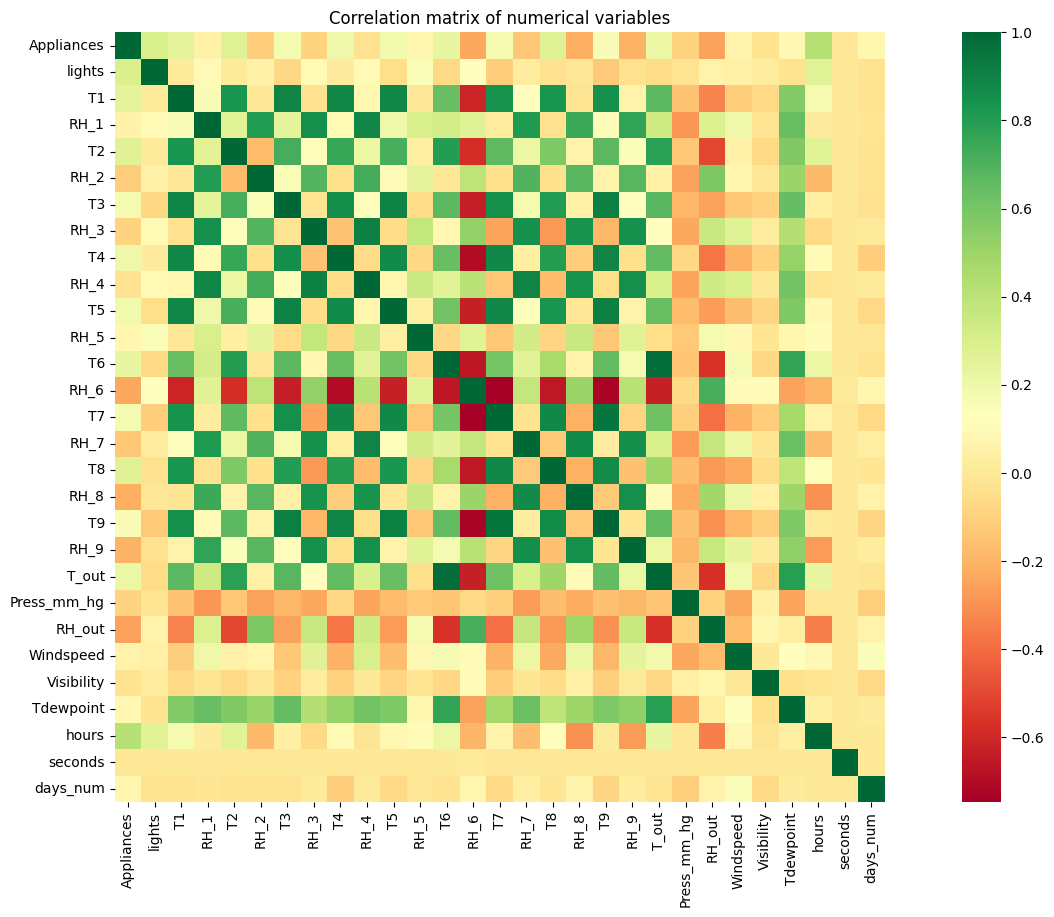

In [ ]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

# 3 Split dataset into Train and Test

In [ ]:
df_d.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'exact_date', 'hours', 'seconds', 'days',
       'days_num'],
      dtype='object')

In [ ]:
# Split the dataset
x= df_d[['lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6','RH_6', 'T7', 'RH_7','T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 
       'hours', 'days_num','Tdewpoint','Press_mm_hg']]
X=x.values
y = df_d['Appliances'].values


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)


# 4. Modeling
Multi liner regression
Lasso
GBM
Random forest regression
SVM
Algorithm for regression. MLR provided the best results. During the data preprocessing I did not get any polynomial or liner relation of any attributes with price. So I chosen the most relevant attributes values for MLR. I run almost MLR and RFR almost 12 times with the different attributes combination and changing the rationalize factors but at the end MLR gave me the best results.

In [ ]:
def result (y_pred_train, y_pred_test,y_train,y_test):
  print("train results")
  print("Mean absolute error =", round(sm.mean_absolute_error(y_train, y_pred_train), 2)) 
  print("Mean squared error =", round(sm.mean_squared_error(y_train, y_pred_train), 2)) 
  print("Median absolute error =", round(sm.median_absolute_error(y_train, y_pred_train), 2)) 
  print("Explain variance score =", round(sm.explained_variance_score(y_train, y_pred_train), 2)) 
  print("R2 score =", round(sm.r2_score(y_train, y_pred_train), 2))


  print("test results")
  print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_test), 2)) 
  print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_test), 2)) 
  print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_test), 2)) 
  print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_test), 2)) 
  print("R2 score =", round(sm.r2_score(y_test, y_pred_test), 2))


#  4.3 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=500, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
        max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
        oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

rfr_result = result(y_pred_train, y_pred_test, y_train, y_test)
rfr_result


In [ ]:
y_pred_test

# 4.3.2 Variable Importance

In [ ]:
# Saving feature names for later use
factor_list = list(x.columns)
# Convert to numpy array
factors = np.array(x)
#Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
factor_importances = [(factor, round(importance, 2)) 
    for factor, importance in zip(factor_list, importances)]
# Sort the feature importances by most important first
factor_importances = sorted(factor_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in factor_importances];

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, factor_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); 
plt.title('Variable Importances');

# 4.3.3 ACTUAL VS PREDICTED

In [ ]:
# pred= pd.DataFrame({'Actual': np.round(y_test, 0), 
#                    'Predicted': np.round(y_pred_test, 0)})
# pred

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='ReLU', input_shape=(27,1)))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='ReLU'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='ReLU'))
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='ReLU'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='ReLU'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(loss='mse', optimizer='adam')

# Train the model
cnn_history=cnn_model.fit(X_train.reshape(-1, 27, 1), y_train, epochs=50, batch_size=64, validation_data=(X_test.reshape(-1, 27, 1), y_test))

Epoch 1/50
207/207 [==============================] - 14s 8ms/step - loss: 0.0288 - val_loss: 0.0256
Epoch 2/50
207/207 [==============================] - 1s 5ms/step - loss: 0.0239 - val_loss: 0.0225
Epoch 3/50
207/207 [==============================] - 1s 5ms/step - loss: 0.0223 - val_loss: 0.0194
Epoch 4/50
207/207 [==============================] - 1s 6ms/step - loss: 0.0214 - val_loss: 0.0196
Epoch 5/50
207/207 [==============================] - 2s 8ms/step - loss: 0.0205 - val_loss: 0.0202
Epoch 6/50
207/207 [==============================] - 2s 8ms/step - loss: 0.0200 - val_loss: 0.0178
Epoch 7/50
207/207 [==============================] - 1s 5ms/step - loss: 0.0193 - val_loss: 0.0179
Epoch 8/50
207/207 [==============================] - 1s 6ms/step - loss: 0.0191 - val_loss: 0.0174
Epoch 9/50
207/207 [==============================] - 1s 5ms/step - loss: 0.0191 - val_loss: 0.0171
Epoch 10/50
207/207 [==============================] - 1s 5ms/step - loss: 0.0187 - val_loss: 0.016

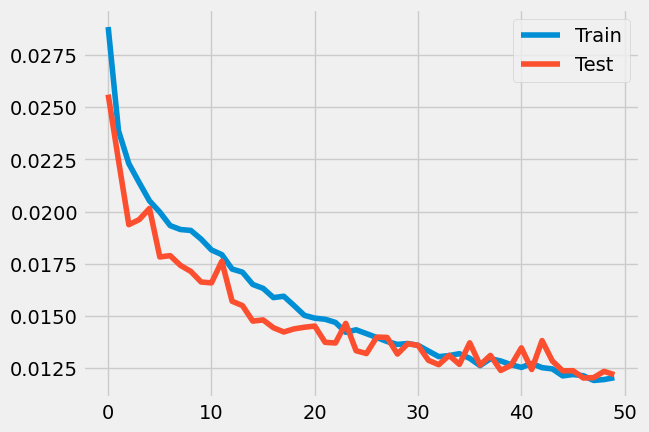

In [ ]:
# plot history
from matplotlib import pyplot
pyplot.plot(cnn_history.history['loss'], label='Train')
pyplot.plot(cnn_history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred_cnn = cnn_model.predict(X_test)

138/138 [==============================] - 1s 3ms/step


In [ ]:
y_pred_cnn

array([[0.22047053],
       [0.26156053],
       [0.51985574],
       ...,
       [0.21910325],
       [0.31883928],
       [0.406574  ]], dtype=float32)

In [ ]:
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler




# reshape X to 3D for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train,(y_train.shape[0],))
y_test= np.reshape(y_test,(y_test.shape[0],))
# create the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(50, activation='relu', return_sequences=False, input_shape=(27, 1)),
    #keras.layers.LSTM(50, activation='relu',return_sequence = True),
    keras.layers.Dense(1)
])




# compile the model
model.compile(optimizer='adam', loss='mse')

# train the mode
history = model.fit(X_train, y_train, epochs=50,validation_data=(X_test, y_test), batch_size=10, verbose=2, shuffle=False)

Epoch 1/50
1320/1320 - 64s - loss: 0.0301 - val_loss: 0.0295 - 64s/epoch - 48ms/step
Epoch 2/50
1320/1320 - 63s - loss: 0.0278 - val_loss: 0.0262 - 63s/epoch - 48ms/step
Epoch 3/50
1320/1320 - 64s - loss: 0.0245 - val_loss: 0.0228 - 64s/epoch - 49ms/step
Epoch 4/50
1320/1320 - 61s - loss: 0.0230 - val_loss: 0.0220 - 61s/epoch - 46ms/step
Epoch 5/50
1320/1320 - 63s - loss: 0.0224 - val_loss: 0.0218 - 63s/epoch - 48ms/step
Epoch 6/50
1320/1320 - 64s - loss: 0.0220 - val_loss: 0.0216 - 64s/epoch - 48ms/step
Epoch 7/50
1320/1320 - 61s - loss: 0.0218 - val_loss: 0.0213 - 61s/epoch - 46ms/step
Epoch 8/50
1320/1320 - 63s - loss: 0.0214 - val_loss: 0.0211 - 63s/epoch - 47ms/step
Epoch 9/50
1320/1320 - 62s - loss: 0.0211 - val_loss: 0.0210 - 62s/epoch - 47ms/step
Epoch 10/50
1320/1320 - 61s - loss: 0.0208 - val_loss: 0.0207 - 61s/epoch - 46ms/step
Epoch 11/50
1320/1320 - 63s - loss: 0.0204 - val_loss: 0.0206 - 63s/epoch - 48ms/step
Epoch 12/50
1320/1320 - 61s - loss: 0.0203 - val_loss: 0.0201 -

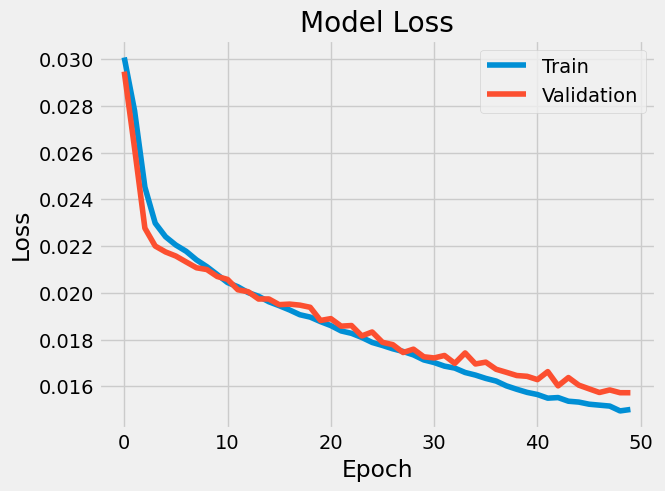

In [ ]:
import matplotlib.pyplot as plt

# # Train the model and record the training history
# history = model.fit(X_train.reshape(-1, 27, 1), y_train, epochs=100, batch_size=64, validation_data=(X_test.reshape(-1, 27, 1), y_test))

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
y_pred = model.predict(X_test)
#y_pred = scaler_y.inverse_transform(y_pred)

138/138 [==============================] - 1s 5ms/step


In [ ]:
y_pred

array([[0.19332655],
       [0.2398167 ],
       [0.37576103],
       ...,
       [0.27504957],
       [0.32262817],
       [0.30855167]], dtype=float32)

In [ ]:
ensembled_out = []
for i in range(len(y_test)):
  val_1 = y_pred_test[i]
  val_2 = y_pred_cnn[i][0]
  val_3 = y_pred[i][0]
  out = (val_1+val_2+val_3)/3
  ensembled_out.append(out)

In [ ]:
ensembled_out

[0.2020990268389384,
 0.2599174083073934,
 0.49078892326354984,
 0.22535500248273213,
 0.25308169051011403,
 0.5237177603244781,
 0.2337606608470281,
 0.2754367241859436,
 0.2967113237380981,
 0.21035732396443685,
 0.18093945904572806,
 0.6461755598386129,
 0.26117780900001525,
 0.31976749769846596,
 0.21906517235438028,
 0.6114004349708557,
 0.36463165322939556,
 0.2630561029911041,
 0.3041372117201487,
 0.2503231012026469,
 0.27819230274359386,
 0.2654998517036438,
 0.5010719060897827,
 0.542080487092336,
 0.26730926203727723,
 0.2008810760974884,
 0.24911194705963136,
 0.5230099952220917,
 0.3531923676331838,
 0.2828280645211538,
 0.42838621171315516,
 0.6628113293647766,
 0.346130509297053,
 0.3830556526184082,
 0.26127645893891654,
 0.2830650047461192,
 0.25879044842720034,
 0.2752376631895701,
 0.322180828332901,
 0.4085262740453084,
 0.2544699135621389,
 0.35237010375658673,
 0.3143455629348755,
 0.17006267130374908,
 0.2546606832742691,
 0.1689556207259496,
 0.4603717053731282,

In [ ]:
y_test

array([0.25  , 0.3125, 0.5   , ..., 0.25  , 0.125 , 0.25  ])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [ ]:
#Number of null values in all columns
df.isnull().sum().sort_values(ascending = True)

date           0
seconds        0
hours          0
exact_date     0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
RH_6           0
T6             0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
days           0
days_num       0
dtype: int64

In [ ]:
# Divide the columns based on type for clear column management 

col_time=["date"]

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

# col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [ ]:
# Seperate dependent and independent variables 
feature_vars = df[ col_time + col_temp + col_hum + col_weather + col_light]
target_vars = df[col_target]

In [ ]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     13955
10     1807
20     1343
30      438
40       48
50        6
Name: lights, dtype: int64

In [ ]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

<ipython-input-54-1e61903ea3ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;


In [ ]:
feature_vars.head(2)

date     T1    T2     T3    T4         T5        T6    T7  \
0  2016-01-11 17:00:00  19.89  19.2  19.79  19.0  17.166667  7.026667  17.2   
1  2016-01-11 17:10:00  19.89  19.2  19.79  19.0  17.166667  6.833333  17.2   

     T8         T9  ...       RH_6       RH_7       RH_8   RH_9     T_out  \
0  18.2  17.033333  ...  84.256667  41.626667  48.900000  45.53  6.600000   
1  18.2  17.066667  ...  84.063333  41.560000  48.863333  45.56  6.483333   

   Tdewpoint  RH_out  Press_mm_hg  Windspeed  Visibility  
0        5.3    92.0        733.5   7.000000   63.000000  
1        5.2    92.0        733.6   6.666667   59.166667  

[2 rows x 25 columns]

In [ ]:
!pip install chart-studio 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= df.date  ,  mode = "lines", y = df.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)
configure_plotly_browser_state()
iplot(fig)

In [ ]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation , 
# decided not to use it for model evaluation as it has least impact

df['WEEKDAY'] = ((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
df['WEEKDAY'].value_counts()

0.0    12720
1.0     4877
Name: WEEKDAY, dtype: int64

In [ ]:
# Find rows with weekday 
temp_weekday =  df[df['WEEKDAY'] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)
configure_plotly_browser_state()
iplot(fig)

In [ ]:
# Find rows with weekend 

temp_weekend =  df[df['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)
configure_plotly_browser_state()
iplot(fig)


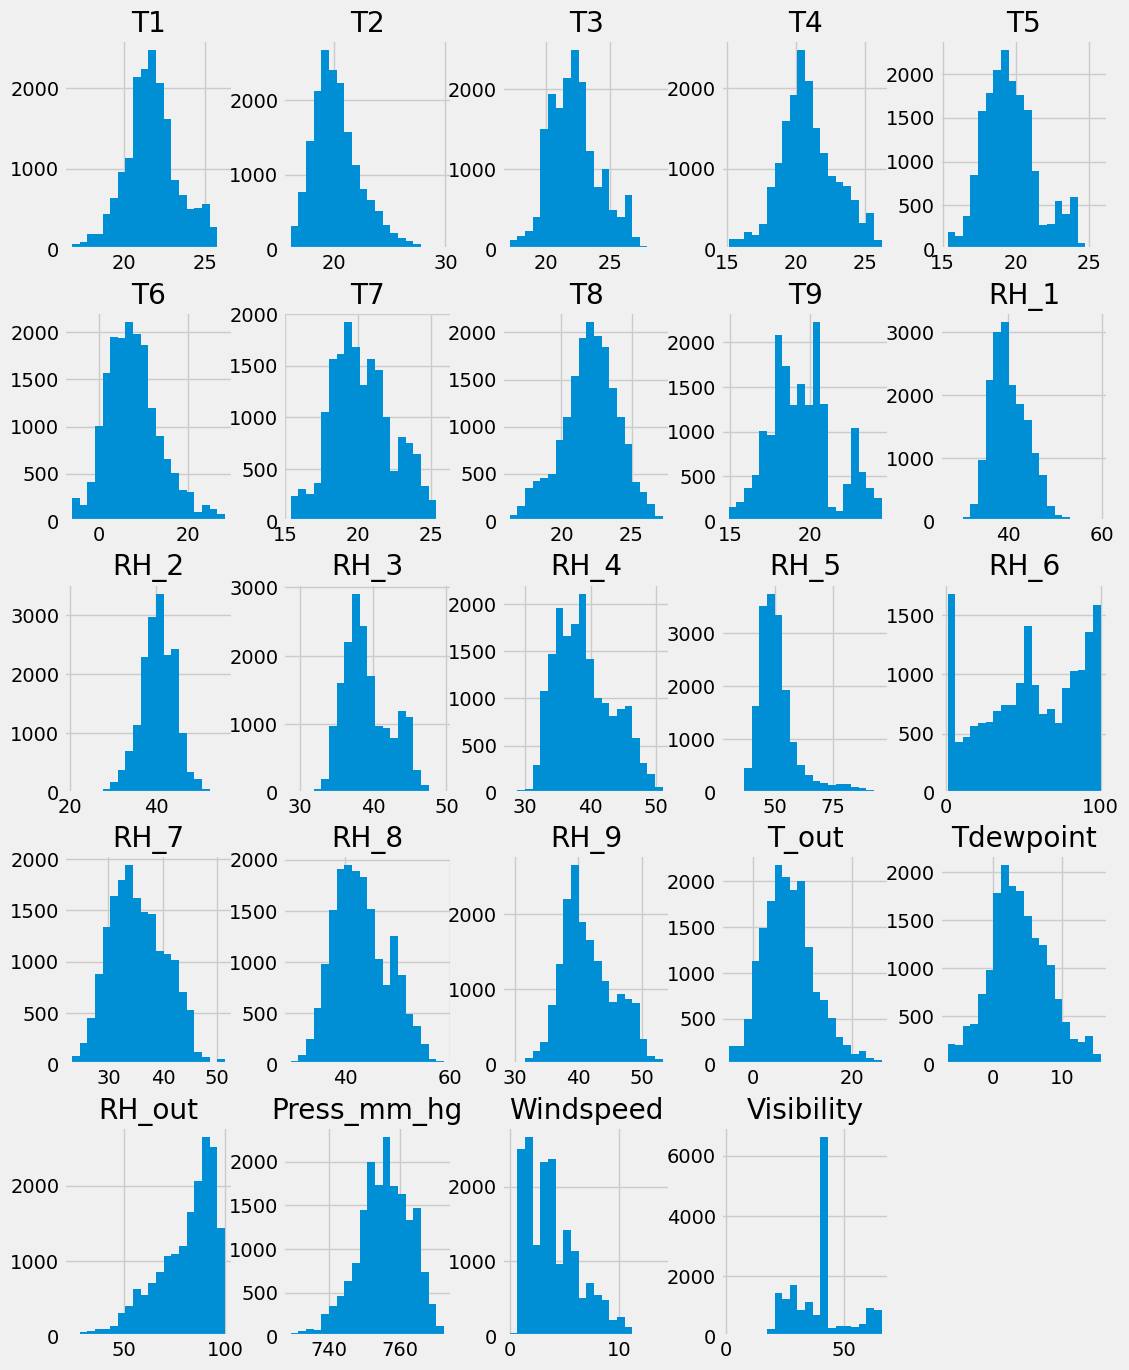

In [ ]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

<ipython-input-63-63d6c042197b>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-63-63d6c042197b>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-63-63d6c042197b>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

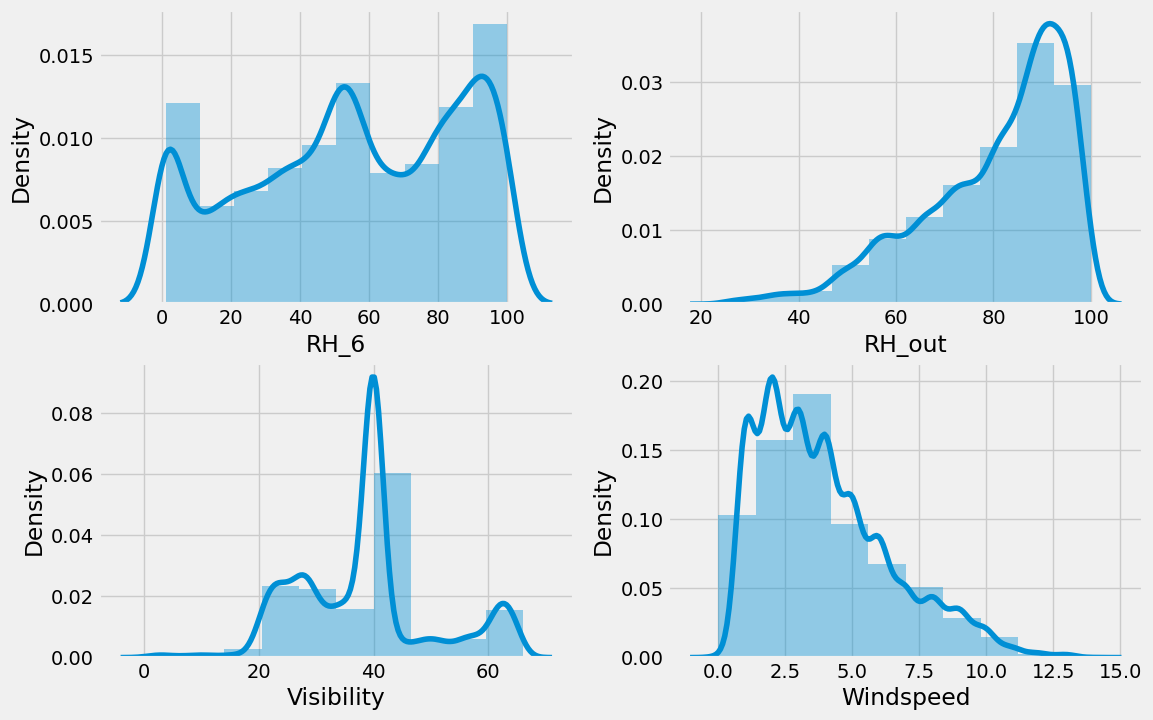

In [ ]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

<ipython-input-64-3dc8460b0070>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




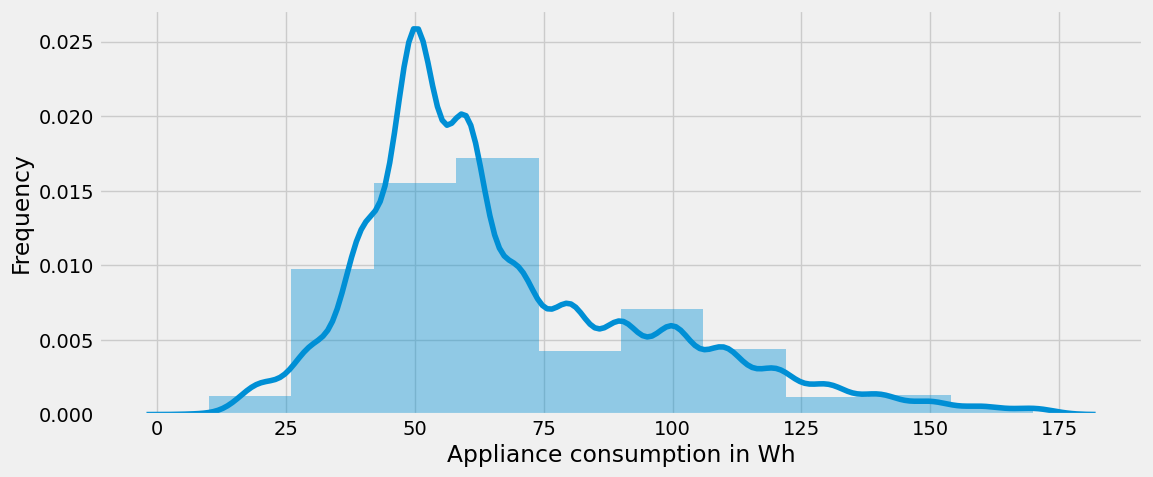

In [ ]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [ ]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    100.0
dtype: float64


<ipython-input-66-7f7408681555>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



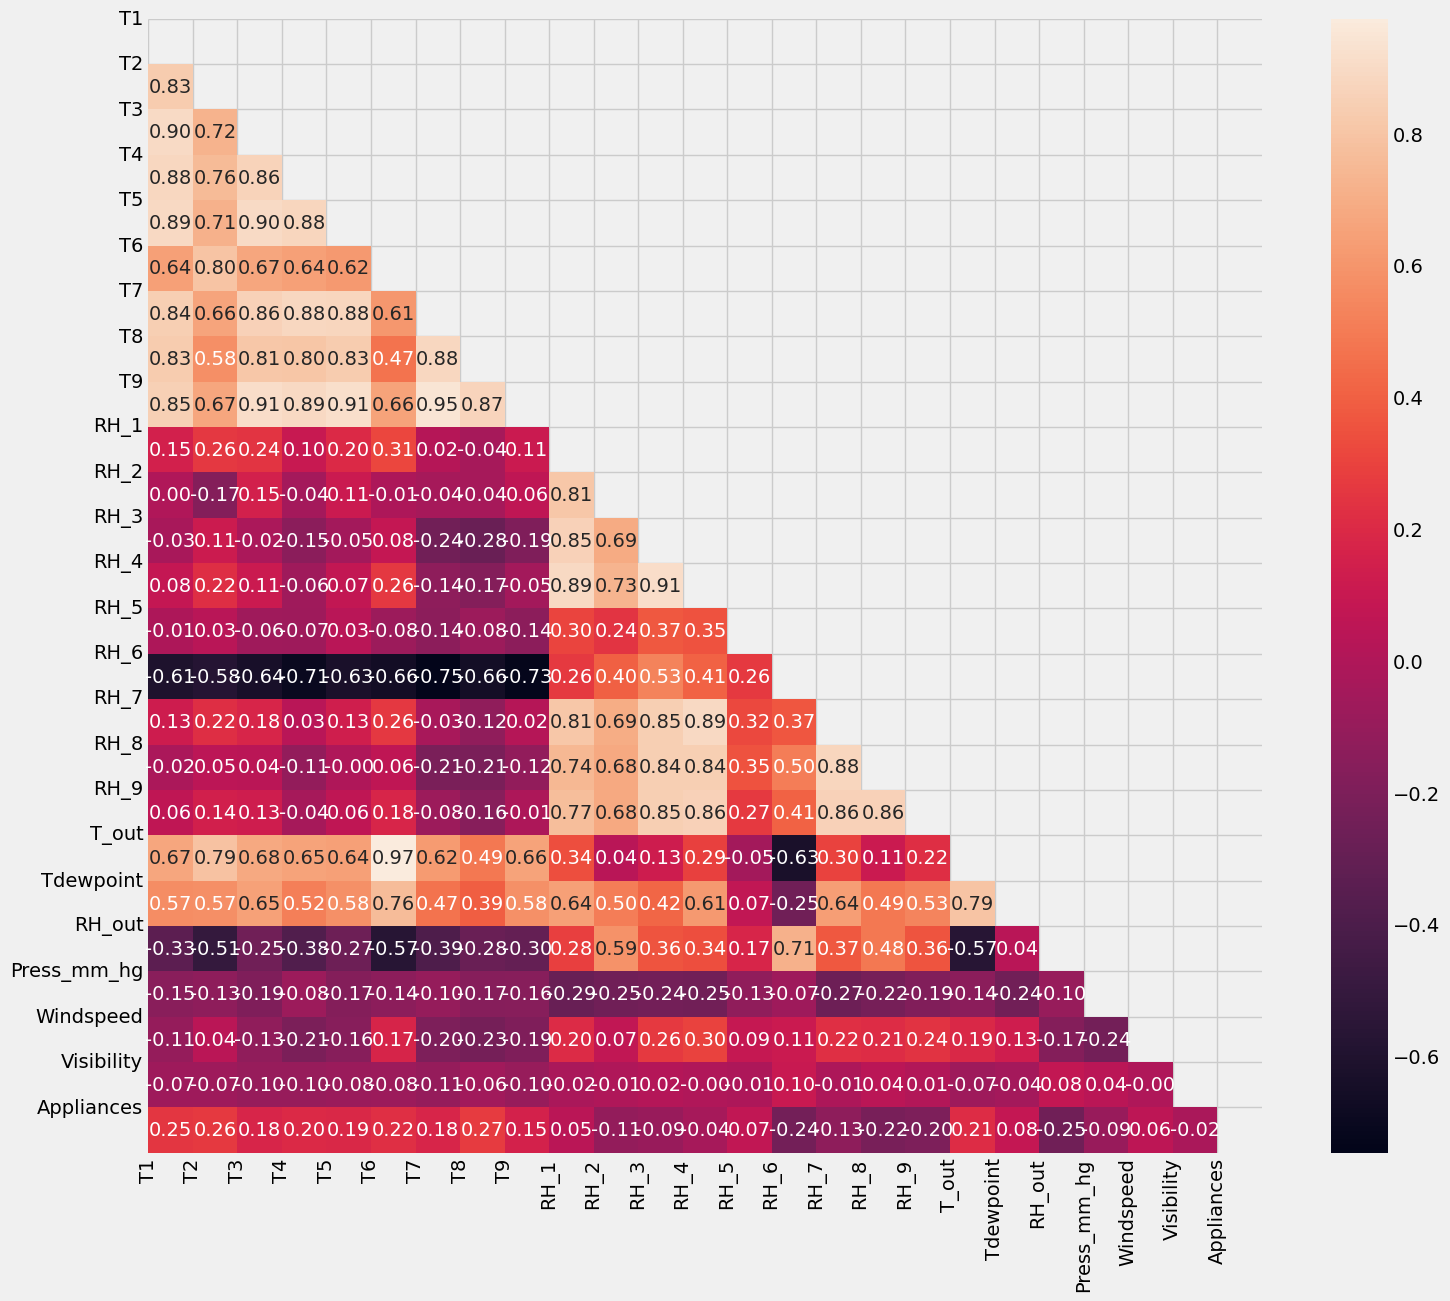

In [ ]:
# Use the weather , temperature , applainces and random column to see the correlation
train_corr = df[col_temp + col_hum + col_weather +col_target]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
T6     T_out        0.974053
T7     T9           0.946417
T5     T9           0.913660
T3     T9           0.912793
RH_3   RH_4         0.910038
T3     T5           0.899945
T1     T3           0.897053
T4     T9           0.892299
RH_4   RH_7         0.891678
RH_1   RH_4         0.890015
T1     T5           0.887043
T7     T8           0.883437
T4     T7           0.882037
T1     T4           0.881085
T5     T7           0.877342
T4     T5           0.877143
RH_7   RH_8         0.876809
T8     T9           0.869282
T3     T4           0.862704
RH_7   RH_9         0.858536
RH_8   RH_9         0.856356
T3     T7           0.855851
RH_4   RH_9         0.855029
RH_1   RH_3         0.854656
T1     T9           0.847975
RH_3   RH_7         0.845370
       RH_9         0.845196
RH_4   RH_8         0.842411
T1     T7           0.841789
RH_3   RH_8         0.840604
T1     T8           0.832588
T5     T8           0.831978
T1     T2           0.831967
RH_1   RH_7      

In [ ]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
train_X.drop(['date'], axis=1, inplace=True)

NameError: ignored

In [ ]:
!pip install boruta

In [ ]:
#Boruta algorith for feature selection
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from datetime import datetime

X=train_X.values
y=train_y.values
y=y.ravel()

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

rfc = RandomForestRegressor(n_estimators=100, max_depth=6, criterion='squared_error')
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
start_time = timer(None)
boruta_selector.fit(X, y)
timer(start_time)

In [ ]:
boruta_selector.support_

In [ ]:
boruta_selector.ranking_